In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/Cleaned Dataset/cleaned_data.csv')
df.head()

,Unnamed: 0,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,under-five deaths,...,Female_homicides,Homicides,Male_bmi,Female_bmi,bmi,Sanitation,GDP,Population,Schooling,Income composition of resources
0,0,Afghanistan,2000,Developing,54.8,321.0,88.0,0.01,10.424960,122.0,...,2.43,9.78,17.086667,17.830000,15.875,21.87,3.854235e+09,19542982.0,5.5,0.338
1,1,Afghanistan,2001,Developing,55.3,316.0,88.0,0.01,10.574728,122.0,...,2.43,9.64,17.116667,17.866667,15.925,21.88,3.854235e+09,19688632.0,5.9,0.340
2,2,Afghanistan,2002,Developing,56.2,3.0,88.0,0.01,16.887351,122.0,...,2.64,10.18,17.150000,17.903333,15.980,23.27,3.854235e+09,21000256.0,6.2,0.341
3,3,Afghanistan,2003,Developing,56.7,295.0,87.0,0.01,11.089053,122.0,...,2.84,10.40,17.146667,17.976667,16.030,24.67,4.539501e+09,22645130.0,6.5,0.373
4,4,Afghanistan,2004,Developing,57.0,293.0,87.0,0.02,15.296066,120.0,...,2.76,9.74,17.180000,18.010000,16.080,26.07,5.220824e+09,23553551.0,6.8,0.381


In [7]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
df.sort_values(by=['Country','Year'], ignore_index=True,inplace=True)

In [8]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,under-five deaths,Total expenditure,...,Female_homicides,Homicides,Male_bmi,Female_bmi,bmi,Sanitation,GDP,Population,Schooling,Income composition of resources
0,Afghanistan,2000,Developing,54.8,321.0,88.0,0.01,10.424960,122.0,8.20,...,2.43,9.78,17.086667,17.830000,15.875,21.87,3.854235e+09,19542982.0,5.5,0.338
1,Afghanistan,2001,Developing,55.3,316.0,88.0,0.01,10.574728,122.0,7.80,...,2.43,9.64,17.116667,17.866667,15.925,21.88,3.854235e+09,19688632.0,5.9,0.340
2,Afghanistan,2002,Developing,56.2,3.0,88.0,0.01,16.887351,122.0,7.76,...,2.64,10.18,17.150000,17.903333,15.980,23.27,3.854235e+09,21000256.0,6.2,0.341
3,Afghanistan,2003,Developing,56.7,295.0,87.0,0.01,11.089053,122.0,8.82,...,2.84,10.40,17.146667,17.976667,16.030,24.67,4.539501e+09,22645130.0,6.5,0.373
4,Afghanistan,2004,Developing,57.0,293.0,87.0,0.02,15.296066,120.0,8.79,...,2.76,9.74,17.180000,18.010000,16.080,26.07,5.220824e+09,23553551.0,6.8,0.381


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2912 non-null   object 
 1   Year                             2912 non-null   int64  
 2   Status                           2912 non-null   object 
 3   Life expectancy                  2912 non-null   float64
 4   Adult Mortality                  2912 non-null   float64
 5   infant deaths                    2912 non-null   float64
 6   Alcohol                          2912 non-null   float64
 7   percentage expenditure           2912 non-null   float64
 8   under-five deaths                2912 non-null   float64
 9   Total expenditure                2912 non-null   float64
 10  HIV/AIDS                         2912 non-null   float64
 11  thinness 1-19 years              2912 non-null   float64
 12  Male_suicide_rate   

Here, we need to convert Country and Status column to its corresponding numeric datatype

In [10]:
country_list = list(df.Country.unique())

In [11]:
df.Country.nunique()

182

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
# we can use le.inverse_transform to reverse the process of label encoder

In [14]:
df['Country'] = le.fit_transform(df['Country'])
df['Status'] = le.fit_transform(df['Status'])

In [15]:
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,under-five deaths,Total expenditure,...,Female_homicides,Homicides,Male_bmi,Female_bmi,bmi,Sanitation,GDP,Population,Schooling,Income composition of resources
2285,142,2013,1,75.3,122.0,1.0,9.16,880.640337,1.0,1.12,...,1.72,2.33,19.380000,18.845000,19.120,97.08,4.839424e+10,7.164132e+06,14.1,0.766
545,34,2001,1,72.2,11.0,457.0,2.84,14.230645,558.0,4.56,...,1.73,2.14,19.076667,19.010000,17.270,57.72,1.339400e+12,1.271850e+09,9.6,0.592
1869,116,2013,1,73.9,157.0,2.0,3.58,366.484180,3.0,8.43,...,2.85,11.80,19.080000,19.800000,19.430,69.89,1.098298e+10,6.119379e+06,11.5,0.630
760,47,2008,1,62.0,289.0,1.0,0.49,171.768645,2.0,8.50,...,3.79,7.79,19.403333,20.063333,17.750,52.35,9.991053e+08,8.828860e+05,5.0,0.427
1865,116,2009,1,73.2,163.0,3.0,3.36,292.753101,3.0,6.82,...,3.71,15.13,21.130000,22.306667,19.295,65.96,8.298680e+09,5.770639e+06,11.3,0.613


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2912 non-null   int64  
 1   Year                             2912 non-null   int64  
 2   Status                           2912 non-null   int64  
 3   Life expectancy                  2912 non-null   float64
 4   Adult Mortality                  2912 non-null   float64
 5   infant deaths                    2912 non-null   float64
 6   Alcohol                          2912 non-null   float64
 7   percentage expenditure           2912 non-null   float64
 8   under-five deaths                2912 non-null   float64
 9   Total expenditure                2912 non-null   float64
 10  HIV/AIDS                         2912 non-null   float64
 11  thinness 1-19 years              2912 non-null   float64
 12  Male_suicide_rate   

###Different Regressors

In [17]:
X = df.drop(['Life expectancy'], axis=1)
Y = df['Life expectancy']

In [18]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [19]:
def best_model_finder(X,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse','mae'],
                'splitter': ['best','random']
            }
        },
        'elasticNet':{
            'model': ElasticNet(),
            'params': {
                'selection' : ['cyclic', 'random'],
                'alpha': [0.1,1,2,5,10], 
                'l1_ratio': [0.25, 0.5, 0.75]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params': {
                'selection' : ['cyclic', 'random'],
                'alpha': [0.1,1,2,5,10]
            }
        },
        'ridge':{
            'model': Ridge(),
            'params': {
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
                'alpha': [0.1,1,2,5,10]
            }
        }  
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [20]:
best_model_finder(X,Y)

,model,best_score,best_params
0,linear_regression,0.869869,{'fit_intercept': False}
1,decision_tree,0.938172,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,elasticNet,0.867392,"{'alpha': 0.1, 'l1_ratio': 0.25, 'selection': ..."
3,lasso,0.866326,"{'alpha': 0.1, 'selection': 'cyclic'}"
4,ridge,0.869873,"{'alpha': 10, 'solver': 'auto'}"


In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

In [22]:
l = list(df.columns)

In [23]:
l.remove('Country')
l.remove('Year')
l.remove('Status')
l.remove('Life expectancy')

In [24]:
l

['Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'under-five deaths',
 'Total expenditure',
 'HIV/AIDS',
 'thinness 1-19 years',
 'Male_suicide_rate',
 'Female_suicide_rate',
 'suicide_rate',
 'Male_homicides',
 'Female_homicides',
 'Homicides',
 'Male_bmi',
 'Female_bmi',
 'bmi',
 'Sanitation',
 'GDP',
 'Population',
 'Schooling',
 'Income composition of resources']

In [25]:
df1 = df.copy()

In [26]:
for i in l:
  df1[i] = scaler.fit_transform(df1[[i]])

In [27]:
df1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,under-five deaths,Total expenditure,...,Female_homicides,Homicides,Male_bmi,Female_bmi,bmi,Sanitation,GDP,Population,Schooling,Income composition of resources
0,0,2000,1,54.8,0.443213,0.048889,0.00000,0.000535,0.0488,0.379544,...,0.044331,0.097195,0.234953,0.199678,0.101785,0.196524,0.000208,0.014109,0.265700,0.356540
1,0,2001,1,55.3,0.436288,0.048889,0.00000,0.000543,0.0488,0.360155,...,0.044331,0.095767,0.237937,0.203223,0.108394,0.196627,0.000208,0.014215,0.285024,0.358650
2,0,2002,1,56.2,0.002770,0.048889,0.00000,0.000867,0.0488,0.358216,...,0.048167,0.101275,0.241254,0.206769,0.115664,0.210921,0.000208,0.015166,0.299517,0.359705
3,0,2003,1,56.7,0.407202,0.048333,0.00000,0.000569,0.0488,0.409598,...,0.051820,0.103519,0.240922,0.213860,0.122274,0.225319,0.000246,0.016358,0.314010,0.393460
4,0,2004,1,57.0,0.404432,0.048333,0.00056,0.000785,0.0480,0.408143,...,0.050359,0.096787,0.244238,0.217083,0.128883,0.239716,0.000283,0.017016,0.328502,0.401899


In [28]:
X_scaled = df1.drop(['Life expectancy'], axis=1)
Y_scaled = df1['Life expectancy']

In [29]:
best_model_finder(X_scaled,Y_scaled)

,model,best_score,best_params
0,linear_regression,0.869867,{'fit_intercept': False}
1,decision_tree,0.938027,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,elasticNet,0.806961,"{'alpha': 0.1, 'l1_ratio': 0.75, 'selection': ..."
3,lasso,0.832997,"{'alpha': 0.1, 'selection': 'cyclic'}"
4,ridge,0.865287,"{'alpha': 0.1, 'solver': 'sparse_cg'}"


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [32]:
model = DecisionTreeRegressor(criterion= 'friedman_mse', splitter= 'best') 

In [33]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [34]:
model.score(X_test, y_test)

0.9365572466113287

In [35]:
y_predicted = model.predict(X_test)

In [36]:
df_result = pd.DataFrame({'y_test':y_test, 'y_predicted': y_predicted})

In [37]:
df_result

,y_test,y_predicted
1192,65.5,66.0
496,46.0,45.3
1002,81.0,86.0
1009,57.4,57.6
1641,82.0,80.0
...,...,...
380,78.3,77.1
1626,56.5,56.0
2314,48.1,56.2
2400,57.3,56.0


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_predicted)
rmse = mean_squared_error(y_test, y_predicted, squared=False)
mae = mean_absolute_error(y_test, y_predicted)
r_squared = r2_score(y_test, y_predicted)

print("Mean squared error (MSE):", mse)
print("Root mean squared error (RMSE):", rmse)
print("Mean absolute error (MAE):", mae)
print("Coefficient of determination (R-squared):", r_squared)

Mean squared error (MSE): 5.848885077186964
Root mean squared error (RMSE): 2.418446831581576
Mean absolute error (MAE): 1.2981132075471693
Coefficient of determination (R-squared): 0.9365572466113287


(35.0, 95.0)

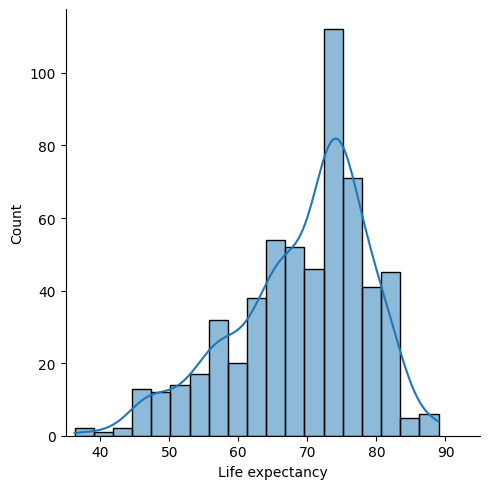

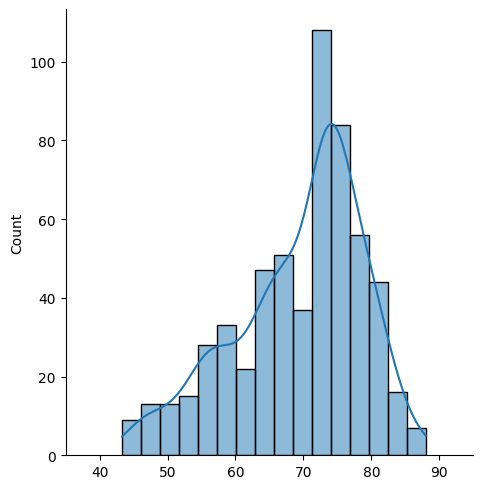

In [39]:
sns.displot(y_test, kde=True)
plt.xlim(35,95)
sns.displot(y_predicted, kde=True)
plt.xlim(35,95)